# This notebook is purely for testing purposes. It is not part of the project.


In [163]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from Constants import Constants

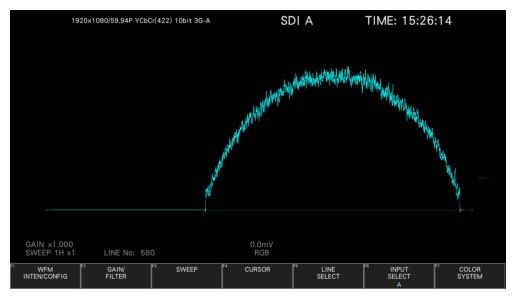

In [164]:
sample_image = cv2.imread(Constants.LOCAL_FILE_PATH_BMP)
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# display the image
plt.imshow(sample_image)
# turn off axis
plt.axis("off")
plt.show()


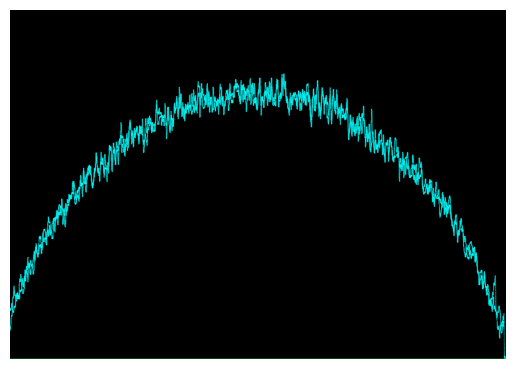

In [165]:
# crop to region of interest
roi = sample_image[92:775,775:1745] # isolate the waveform
# display the image
plt.imshow(roi)
# turn off axis
plt.axis("off")
plt.show()


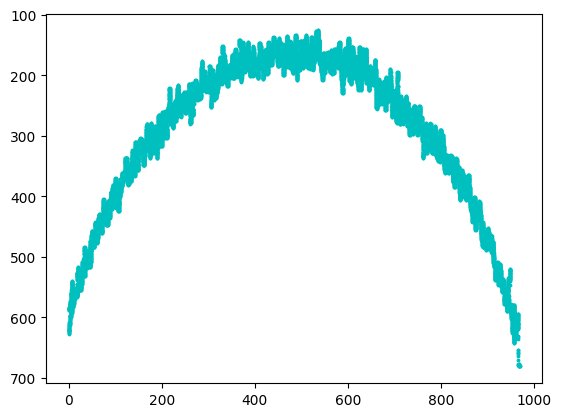

In [166]:
data = np.array(roi)


lower_cyan_range = np.array([0, 200, 200])
upper_cyan_range = np.array([100, 255, 255])

# get cyan coordinates
cyan_mask = cv2.inRange(data, lower_cyan_range, upper_cyan_range)
cyan_coordinates = np.where(cyan_mask == 255)
cyan_coordinates = np.array(cyan_coordinates)

# Plot the cyan pixel locations
plt.scatter(cyan_coordinates[1], cyan_coordinates[0], c='c', s=3)

# Invert the y axis, because the origin is at the top left corner in an image
plt.gca().invert_yaxis()

# Show the plot
plt.show()

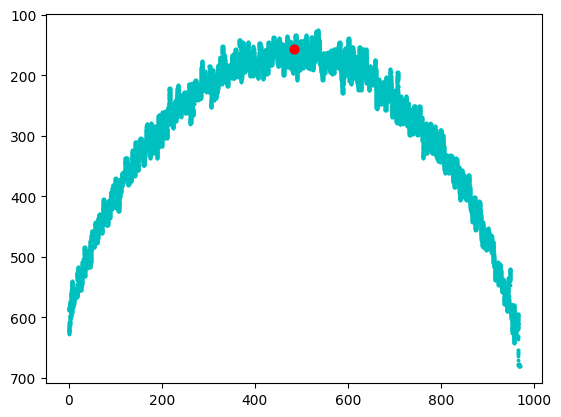

Middle cyan pixel's x value: 485
Middle cyan pixel's y value: 157


In [167]:
# find the middle point's x value of the whole image
middle_point = int(data.shape[1]/2)

# find the corresponding cyan pixel in the middle point
middle_cyan_pixel = np.where(cyan_coordinates[1] == middle_point)[0][0]


# mark the middle cyan pixel on the plot toether with the other cyan pixels
plt.scatter(cyan_coordinates[1], cyan_coordinates[0], c='c', s=3)
# Invert the y axis, because the origin is at the top left corner in an image
plt.gca().invert_yaxis()
# mark the middle cyan pixel
plt.scatter(cyan_coordinates[1][middle_cyan_pixel], cyan_coordinates[0][middle_cyan_pixel], c='r', s=40)
# Show the plot
plt.show()

# print the middle cyan pixel's x and y values
print(f"Middle cyan pixel's x value: {cyan_coordinates[1][middle_cyan_pixel]}")
print(f"Middle cyan pixel's y value: {cyan_coordinates[0][middle_cyan_pixel]}")





In [168]:
mid_cyan_y = cyan_coordinates[0][middle_cyan_pixel]

print(type(mid_cyan_y))
print(mid_cyan_y)

# print data shape
print(data.shape)

# convet the y value to target level
target_level = (1-mid_cyan_y/float(data.shape[0]))* 10000
target_level = int(target_level)

print(f"Target level: {target_level}")


<class 'numpy.int64'>
157
(683, 970, 3)
Target level: 7701


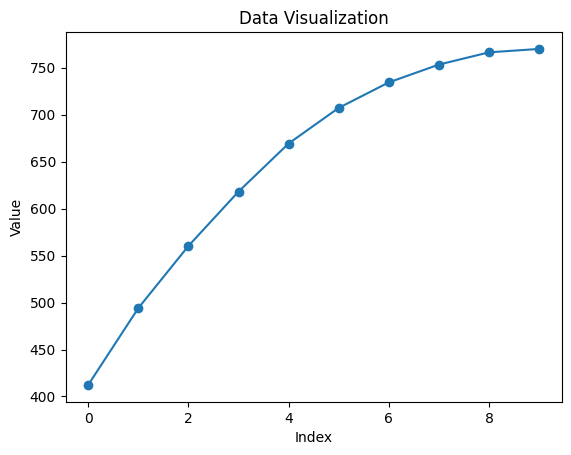

[ 168.72426453   23.37335663 -138.07395881]


C:\Users\TAS_Backup_PC\AppData\Local\Temp\ipykernel_9828\252703483.py:21: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


Text(0.5, 1.0, 'Data Visualization')

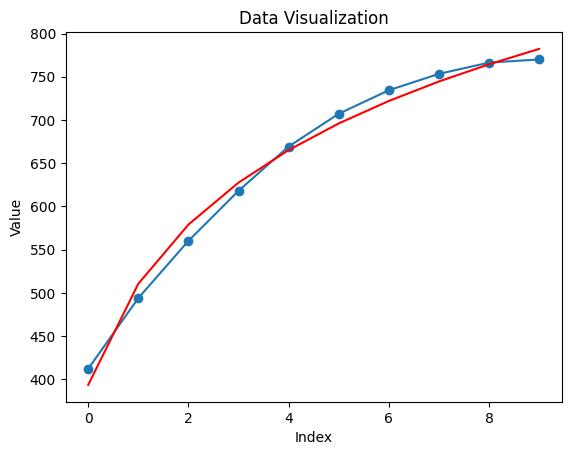

In [169]:
import matplotlib.pyplot as plt

data = [412.3, 494.06, 560.21, 618.1, 669.3, 707.21, 734.37, 753.34, 766.36, 770]

# Plotting the data
plt.plot(data, marker='o')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Visualization')

# Display the plot
plt.show()

# perform a log fit
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.log(b * x) + c

xdata = np.linspace(1, 10, num=10)
ydata = np.array(data)

popt, pcov = curve_fit(func, xdata, ydata)

print(popt)

# Plotting the data
plt.plot(data, marker='o')
# plot fit curve
plt.plot(func(xdata, *popt), 'r-')


# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data Visualization')


